In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

1) Calculate and plot 
Fn
/Fn
-
1 with n using memorization 
method

In [2]:
def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1, table) + fib3(n-2, table)
    return table[n]

Text(0, 0.5, '$F_n/F_{n-1}$ - Golden ratio')

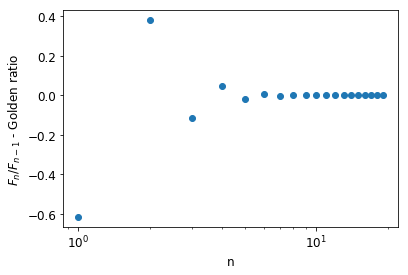

In [3]:
n=20
table = [None]*(n+1)
fib3(n, table)
Fn = np.array(table)
plt.rc("font", size=12)
plt.plot(np.arange(1,n),Fn[2:]/Fn[1:-1] - (np.sqrt(5)+1)/2., 'o')
plt.semilogx()
plt.xlabel("n")
plt.ylabel(r"$F_n/F_{n-1}$ - Golden ratio")
# After some initial oscillation, the ratio approach the golden ratio i.e., (sqrt(5)+1)/2.

2) a) Use the iteration method, tabulation method,  and 
matrix method to calculate the time spent for different n 
(e.g. 1, 10, 100, 1000, 10000, 
...
uniform in the log 
space). 

What is "iteration method"? I guess "iteration" and "resursion" are two different concepts... and I think tabulation method is more alike iteration method...

iteration method

In [14]:
N = np.array([1,2,4,8,16,32])
times = np.zeros(len(N))

In [15]:
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)   # Please finish this line
    
for i in range(len(N)):
    start_time = time.time()
    fib2(N[i])
    times[i] = (time.time() - start_time)

[]

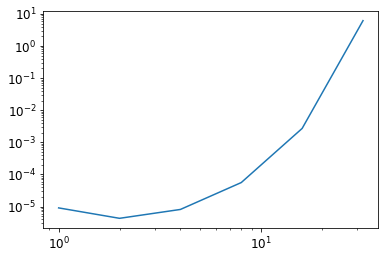

In [16]:
plt.plot(N, times)
plt.loglog()

In [22]:
np.save("recursiontimes.npy", (N, times))

Tabulation method

In [ ]:
def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
    
    for i in range(2,n+1):
        table[i] = table[i-2] + table[i-1]
        # Please finish this line
        
    return table[n]

N = 10**np.arange(7)
times = np.zeros(len(N))
for i in range(len(N)):
    start_time = time.time()
    fib4(N[i])
    times[i] = (time.time() - start_time)

In [37]:
np.save("tabulartimes.npy", (N, times))

[]

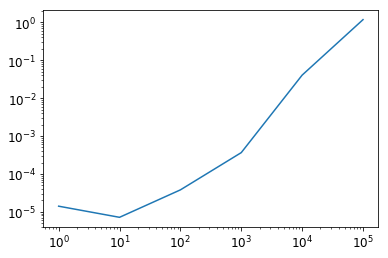

In [34]:
plt.plot(N, times)
plt.loglog()

Matrix Method

In [20]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f

N = 10**np.arange(1,9)
times = np.zeros(len(N))
for i in range(len(N)):
    start_time = time.time()
    fib5(N[i])
    times[i] = (time.time() - start_time)

np.save("matrixtimes.npy", (N, times))

[]

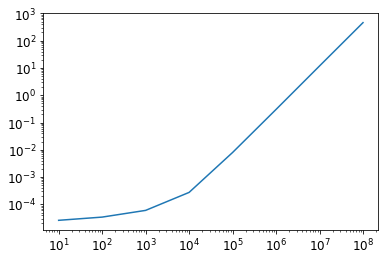

In [46]:
plt.plot(N, times)
plt.loglog()

In [5]:
N1, T1 = np.load("recursiontimes.npy")
N2, T2 = np.load("tabulartimes.npy")
N3, T3 = np.load("matrixtimes.npy")

Text(0, 0.5, 't/s')

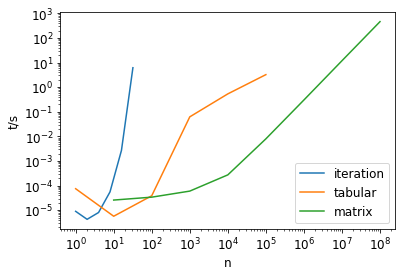

In [9]:
plt.plot(N1, T1, label='iteration')
plt.plot(N2, T2, label="tabular")
plt.plot(N3, T3, label="matrix")
plt.loglog()
plt.legend()
plt.xlabel('n')
plt.ylabel('t/s')

In [ ]:
# when n->inf, the matrix mehod is the fastest and is linear, the recursion method is exponential.